In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocks-price-appl/AAPL.csv


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/stocks-price-appl/AAPL.csv')
print(df.head())
df.tail()

   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [11]:
df1 = df[['date', 'close']]
print(df1)
print(df1.info())


                           date    close
0     2015-05-27 00:00:00+00:00  132.045
1     2015-05-28 00:00:00+00:00  131.780
2     2015-05-29 00:00:00+00:00  130.280
3     2015-06-01 00:00:00+00:00  130.535
4     2015-06-02 00:00:00+00:00  129.960
...                         ...      ...
1253  2020-05-18 00:00:00+00:00  314.960
1254  2020-05-19 00:00:00+00:00  313.140
1255  2020-05-20 00:00:00+00:00  319.230
1256  2020-05-21 00:00:00+00:00  316.850
1257  2020-05-22 00:00:00+00:00  318.890

[1258 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB
None


In [12]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
df1['date'] = pd.to_datetime(df1['date']).dt.date  # Convert to datetime and extract date

# Print the DataFrame with modified 'date' column
print(df1)


            date    close
0     2015-05-27  132.045
1     2015-05-28  131.780
2     2015-05-29  130.280
3     2015-06-01  130.535
4     2015-06-02  129.960
...          ...      ...
1253  2020-05-18  314.960
1254  2020-05-19  313.140
1255  2020-05-20  319.230
1256  2020-05-21  316.850
1257  2020-05-22  318.890

[1258 rows x 2 columns]


/tmp/ipykernel_33/735644523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date']).dt.date  # Convert to datetime and extract date


In [13]:
df1.head()

,date,close
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960


# step-2  resampling

In [16]:
df1['date'] = pd.to_datetime(df1['date'])  # Convert 'date' to datetime
df1.set_index('date', inplace=True)  # Set 'date' as the index (now datetime)
ts = df1['close'].resample('M').sum()  #sampling do not take rangeindex so we have to convert date to index column
ts.head()


/tmp/ipykernel_33/1540513690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])  # Convert 'date' to datetime
/tmp/ipykernel_33/1540513690.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df1['close'].resample('M').sum()


date
2015-05-31     394.105
2015-06-30    2811.740
2015-07-31    2757.380
2015-08-31    2381.290
2015-09-30    2368.750
Freq: ME, Name: close, dtype: float64

<Axes: xlabel='date'>

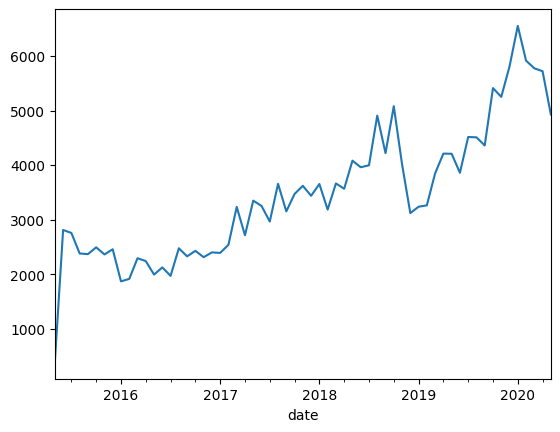

In [17]:
ts.plot()

# step-3: Stationanry check

In [18]:
import statsmodels.api as sm

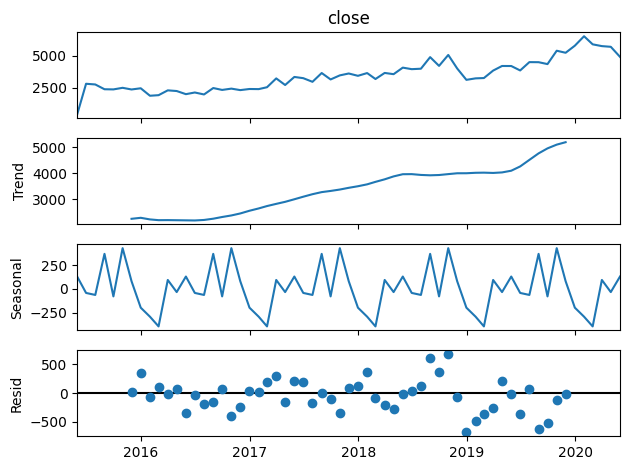

In [19]:
decomposition=sm.tsa.seasonal_decompose(ts,model='additive')
fig=decomposition.plot()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adftest=adfuller(ts)

In [23]:
print('pvalue of adfuller test is :',adftest[1])

pvalue of adfuller test is : 0.956078586384707


# step-4:Train test split

In [24]:
len(ts)

61

In [60]:
train=ts[:30]
test=ts[30:]

In [61]:
len(test)

31

# ARIMA MODEL BUILDING:
ARIMA model has 3 components:
1.AR
2.MA
3.Integrated

for building data ARIMA we need the 
AR order p
MA order q
Integrated order d

# step-5:Hyerparameters of ARINA model p q d
1.method ACF,PACF plots
2.AUTO_ARIMA function
3.for loop (we will use this)

In [62]:
import itertools

In [70]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [72]:
pdq_combination=list(itertools.product(p,d,q))

In [73]:
len(pdq_combination)

128

In [74]:
rmse=[]
order1=[]

In [75]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        rmse.append(error)
        
    except:
        continue

In [ ]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [45]:
 results.to_csv('ARIMA_result.csv')
# # Sort the Series in ascending order
# sorted_result = results.sort_values(by='RMSE',ascending=True)

# # Print the sorted Series
# print(sorted_result)
#by this we got to know the  p=5,q=4,d=0

Empty DataFrame
Columns: [RMSE]
Index: []


# step-6:Build ARIMA model

In [77]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5, 0, 4)).fit()


# step-7:pridict the test dataset

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
pred=model.predict(start=len(train), end=(len(ts)-1))

# step-8:Model Evaluation

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
len(test),len(pred)

(31, 31)

In [82]:
error=np.sqrt(mean_squared_error(test,pred))
error

1672.6291943528283

In [83]:
test.mean(),np.sqrt(test.var())

(4383.167903225807, 925.1156574358457)

<Axes: xlabel='date'>

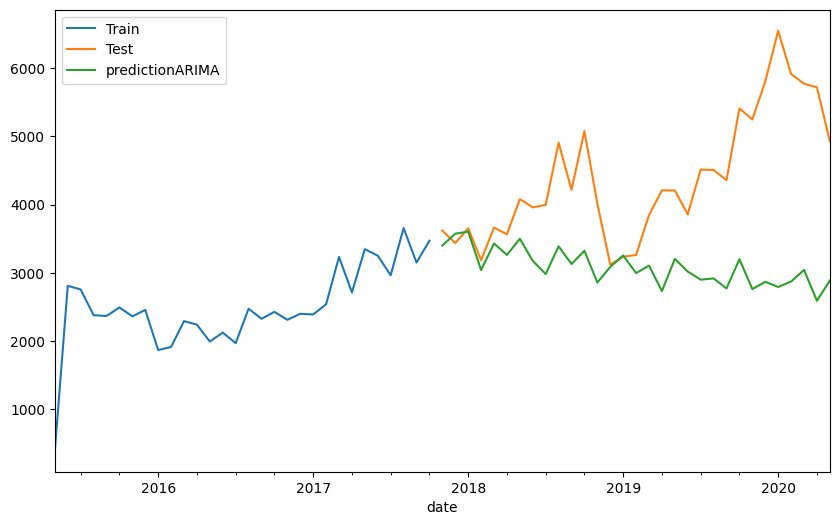

In [84]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictionARIMA')

# step-9:predict the future data

In [86]:
final_model=ARIMA(ts,order=(5,0,4)).fit()  #build on full data set

In [87]:
prediction=final_model.predict(len(ts),len(ts)+6)

<Axes: xlabel='date'>

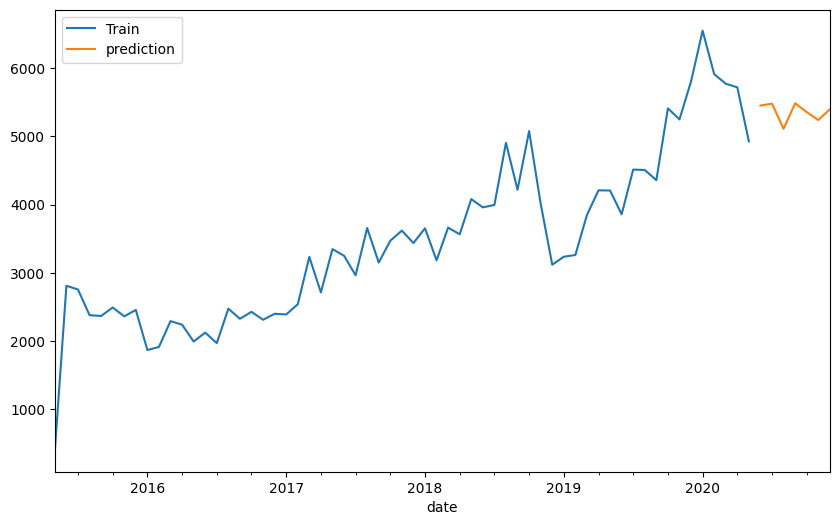

In [88]:
ts.plot(legend=True ,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='prediction')